In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from acquire import get_telco_data
from prep import prep_telco

import warnings
warnings.filterwarnings('ignore')


Reading from CSV file...


In [2]:
telco_df = get_telco_data()

telco_df.info()
telco_df.head()

Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streamin

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


In [3]:
telco_df_clean, telco_train, telco_validate, telco_test = prep_telco(telco_df)

In [31]:
telco_df_clean.head()
print(f'Max total charges: ${telco_df_clean.total_charges.max():.2f}. This person is estimated to have spent ${(telco_df_clean.total_charges.max()) / 72:.2f} per month, on average.')
print(f'The person who has paid the highest total charges actually paid ${telco_df_clean[telco_df_clean.total_charges == telco_df_clean.total_charges.max()].monthly_charges.mean():.2f} per month.')

Max total charges: $8684.80. This person is estimated to have spent $120.62 per month, on average.
The person who has paid the highest total charges actually paid $117.80 per month.


In [6]:
telco_nums = telco_df_clean.select_dtypes(include=np.number)
telco_cats = telco_df_clean.select_dtypes(exclude=np.number)

print(telco_nums.shape, telco_cats.shape)

(7032, 34) (7032, 17)


In [7]:
telco_cats.info()
telco_cats.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            7032 non-null   object
 1   gender                 7032 non-null   object
 2   partner                7032 non-null   object
 3   dependents             7032 non-null   object
 4   phone_service          7032 non-null   object
 5   multiple_lines         7032 non-null   object
 6   online_security        7032 non-null   object
 7   online_backup          7032 non-null   object
 8   device_protection      7032 non-null   object
 9   tech_support           7032 non-null   object
 10  streaming_tv           7032 non-null   object
 11  streaming_movies       7032 non-null   object
 12  paperless_billing      7032 non-null   object
 13  churn                  7032 non-null   object
 14  contract_type          7032 non-null   object
 15  payment_type         

,customer_id,gender,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,contract_type,payment_type,internet_service_type
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,2,2,3,4,3
top,0002-ORFBO,Male,No,No,Yes,No,No,No,No,No,No,No,Yes,No,Month-to-month,Electronic check,Fiber optic
freq,1,3549,3639,4933,6352,3385,3497,3087,3094,3472,2809,2781,4168,5163,3875,2365,3096


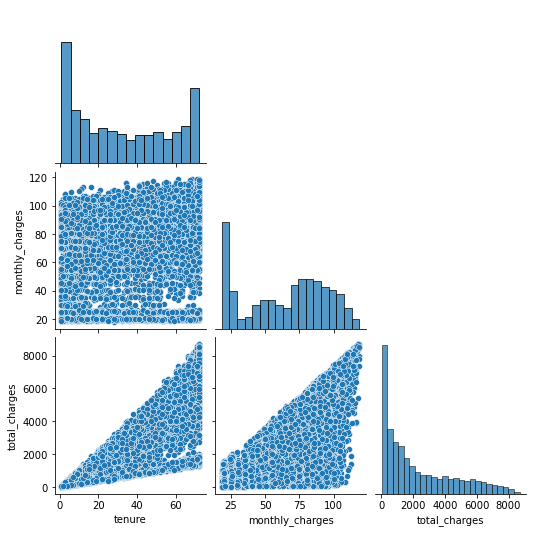

In [8]:
sns.pairplot(telco_nums[['tenure', 'monthly_charges', 'total_charges']], corner=True)

$H_0:$ There is no significant relationship between monthly charges and total charges.

$H_a:$ A significant relationship does exist between monthly charges and total charges.

We reject the null hypothesis; correlation strength between the variables is: 0.651.
Our confidence value for this test was 100.00%.


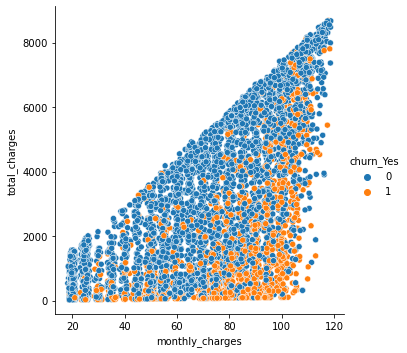

In [10]:
alpha = 0.05
r_coeff, pval = stats.pearsonr(telco_nums.monthly_charges, telco_nums.total_charges)

if pval < alpha and abs(r_coeff) >= 0.5:
    print(f'We reject the null hypothesis; correlation strength between the variables is: {r_coeff:.3f}.\nOur confidence value for this test was {1 - pval:.2%}.')
else:
    print(f'We fail to reject the null hypothesis. Either our confidence value of {1 - alpha:.2%} was not met (confidence value for this test\nwas {1 - pval:.2%}) or the correlation strength ({abs(r_coeff):.3f}) was less than what we consider that of a strong relationship.')

sns.relplot(data= telco_nums, x='monthly_charges', y='total_charges', hue='churn_Yes')


In [5]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5981 to 1671
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   internet_service_type_id               3937 non-null   int64  
 9   online_security                        3937 non-null   object 
 10  online_backup                          3937 non-null   object 
 11  d

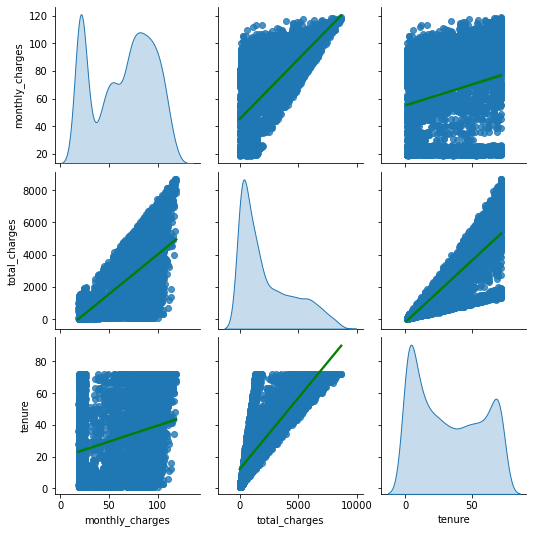

In [39]:
telco_tr_cont = telco_train[['monthly_charges', 'total_charges', 'tenure']]

sns.pairplot(telco_tr_cont, kind='reg', diag_kind='kde', plot_kws= {'line_kws': {'color': 'green'}}, dropna=True)

In [41]:
import explore as ex

ex.plot_cat_and_cont_vars(telco_train)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().